# **Python Assignment-Aviation Accident Data Analysis**

## **First and foremost step is to install pertinent libraries**

In [1]:
#pandas

import pandas as pd
!pip install pyspan
import pyspan as ps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install plotly
import plotly.express as px
!pip install requests
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import re
from scipy import stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.5 MB/s eta 0:00:00


# Upload the file.  An error message ‘utf-8 codec can't decode’ was encountered while uploading file. Through additional coding file was encoded. After resolving this, a Data Frame was created.

# The Exploratory Data Analysis (EDA) process was initiated to familiarize myself with the data. The relevant code was executed to view all columns and the first 10 rows. This step allows analyst to identify anomalies and get a glimpse of what changes may be needed in the data.  


In [2]:
path = '/content/AviationData.csv'

df = pd.read_csv(path, encoding='ISO-8859-1')

pd.set_option('display.max_columns', None)

df.head(10)

<ipython-input-2-b5c70e323731>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980
5,20170710X52551,Accident,NYC79AA106,17/09/1979,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19/09/2017
6,20001218X45446,Accident,CHI81LA106,01/08/1981,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06/11/2001
7,20020909X01562,Accident,SEA82DA022,01/01/1982,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01/01/1982
8,20020909X01561,Accident,NYC82DA015,01/01/1982,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01/01/1982
9,20020909X01560,Accident,MIA82DA029,01/01/1982,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01/01/1982


In [3]:
# Steps to clean data
# which columns to clean
# insert new column reflecting only year
# split column location with separate column of city
# inspect weather condition column and replace terms in weather condition
#Injury severity fatal row to reflect only Fatal
# Country with null value to be replaced with Island
# Remove column latitude and longitude
# Total Fatal Injuries column null values to be replaced with Non Fatal
# Column wise adjust null values


# Steps to Clean Data

# *   Identification and Treatment of Null values/ Missing Values:
1.   Replacing null values with appropriate notation i.e. “Unknown” or “No record” or as per requirement.
2.   Dropping columns with nulls value that would have no major impact on the results
3. Mean imputation to replace null with the mean of the column

# *   Structuring Data:

1.   Replacing additional characters in data to eliminate unnecessary information
2.   Replacing acronyms with full description, for clarity
3.   Splitting the column
4.   Checking unique values in columns to synchronize common values
5.   Inserting a new columns

# *   Managing unwanted outliers






In [4]:
#total number of rows and columns

df.shape

(88889, 31)

In [5]:
len(df.columns)

31

In [6]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#Check nulls
pd.set_option('display.max_rows', None)
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [8]:
df["Engine.Type"].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [9]:
df["Broad.phase.of.flight"].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [10]:
df = ps.handle_nulls(df, columns='Location', action='replace', with_val='Unknown')

In [11]:
df = ps.handle_nulls(df, columns='Country', action='replace', with_val='Island')

In [12]:
df = df.drop(columns=['Latitude'])

In [13]:
df = df.drop(columns=['Longitude'])

In [14]:
df = df.drop(columns=['Airport.Code'])

In [15]:
df = ps.handle_nulls(df, columns='Airport.Name', action='replace', with_val='Not on record')

In [16]:
df["Injury.Severity"] = df['Injury.Severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)

In [17]:
df = ps.handle_nulls(df, columns='Injury.Severity', action='replace', with_val='Not on record')

In [18]:
df = ps.handle_nulls(df, columns='Aircraft.damage', action='replace', with_val='Not on record')

In [19]:
df = ps.handle_nulls(df, columns='Aircraft.Category', action='replace', with_val='Not on record')

In [20]:
df = ps.handle_nulls(df, columns='Registration.Number', action='replace', with_val='Not on record')

In [21]:
df = ps.handle_nulls(df, columns='Make', action='replace', with_val='Unidentified')

In [22]:
df = ps.handle_nulls(df, columns='Model', action='replace', with_val='Unidentified')

In [23]:
df = ps.handle_nulls(df, columns='Amateur.Built', action='replace', with_val='Unknown')

In [24]:
df["Number.of.Engines"].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

In [25]:
df['Engine.Type'] = df['Engine.Type'].replace('UNK', 'Unknown')


In [26]:
df = ps.handle_nulls(df, columns='Engine.Type', action='replace', with_val='Unknown')

In [27]:
56866/88889

0.6397417003228746

In [28]:
df = df.drop(columns=['FAR.Description'])

In [29]:
df = df.drop(columns=['Schedule'])

In [30]:
df["Purpose.of.flight"].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [31]:
df = ps.handle_nulls(df, columns='Purpose.of.flight', action='replace', with_val='Unknown')

In [32]:
72241/88889

0.8127102341122073

In [33]:
df = df.drop(columns=['Air.carrier'])

In [34]:
df = ps.handle_nulls(df, columns='Total.Fatal.Injuries', action='replace', with_val=0)

In [35]:
	df = ps.handle_nulls(df, columns='Total.Serious.Injuries', action='replace', with_val=0)

In [36]:
df = ps.handle_nulls(df, columns='Total.Minor.Injuries', action='replace', with_val=0)

In [37]:
df = ps.handle_nulls(df, columns='Total.Uninjured', action='replace', with_val=0)

In [38]:
df["Weather.Condition"].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [39]:
df['Weather.Condition'] = df['Weather.Condition'].replace('UNK', 'Unknown')


In [40]:
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'Unknown')

In [41]:
df = ps.handle_nulls(df, columns='Weather.Condition', action='replace', with_val='Unknown')

In [42]:
#VMC: Good visibility; pilots fly visually.
#IMC: Poor visibility; pilots fly using instruments

In [43]:
df['Weather.Condition'] = df['Weather.Condition'].replace('VMC', 'Good visibility; pilots fly visually')
df['Weather.Condition'] = df['Weather.Condition'].replace('IMC', 'Poor visibility; pilots fly using instruments')

In [44]:
df['Make'] = df['Make'].replace(to_replace='BELL', value='Bell', regex=True)
df['Make'] = df['Make'].replace(to_replace='CESSNA', value='Cessna', regex=True)
df['Make'] = df['Make'].replace(to_replace='BOEING', value='Boeing', regex=True)
df['Make'] = df['Make'].replace(to_replace='PIPER', value='Piper', regex=True)
df['Make'] = df['Make'].replace(to_replace='BEECH', value='Beech', regex=True)


In [45]:
#Broad.phase.of.flight
df["Broad.phase.of.flight"].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [46]:
df = ps.handle_nulls(df, columns='Broad.phase.of.flight', action='replace', with_val='Other')

In [47]:
#Report.Status
df["Report.Status"].unique()

array(['Probable Cause', 'Factual', 'Foreign', ...,
       'The pilot did not ensure adequate clearance from construction vehicles during taxi.',
       'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.',
       'The pilot\x92s loss of control due to a wind gust during landing.'],
      dtype=object)

In [48]:
df = ps.handle_nulls(df, columns='Report.Status', action='replace', with_val='Not disclosed')

In [49]:
#Publication.Date

df = ps.handle_nulls(df, columns='Publication.Date', action='replace', with_val='Not Published')

In [50]:
#Check nulls again
pd.set_option('display.max_rows', None)
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Airport.Name,0
Injury.Severity,0
Aircraft.damage,0
Aircraft.Category,0


In [51]:
# Convert the date column to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], format='%d/%m/%Y')

# Extract the year
df['year'] = df['Event.Date'].dt.year


In [52]:
pd.set_option('display.max_columns', None)

df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Not on record,Fatal,Destroyed,Not on record,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,Not Published,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Not on record,Fatal,Destroyed,Not on record,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,19/09/1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Not on record,Fatal,Destroyed,Not on record,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,Poor visibility; pilots fly using instruments,Cruise,Probable Cause,26/02/2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Not on record,Fatal,Destroyed,Not on record,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Poor visibility; pilots fly using instruments,Cruise,Probable Cause,12/09/2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Not on record,Fatal,Destroyed,Not on record,N15NY,Cessna,501,No,NaN,Unknown,Personal,1.0,2.0,0.0,0.0,Good visibility; pilots fly visually,Approach,Probable Cause,16/04/1980,1979
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Not on record,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,Good visibility; pilots fly visually,Climb,Probable Cause,19/09/2017,1979
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Not on record,Fatal,Destroyed,Not on record,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Poor visibility; pilots fly using instruments,Unknown,Probable Cause,06/11/2001,1981
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,Good visibility; pilots fly visually,Takeoff,Probable Cause,01/01/1982,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,Poor visibility; pilots fly using instruments,Landing,Probable Cause,01/01/1982,1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JACKSONVILLE INTL,Non-Fatal,Substantial,Not on record,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,Poor visibility; pilots fly using instruments,Cruise,Probable Cause,01/01/1982,1982


In [53]:
# Split the 'location' column into 'city' and 'country', handling missing commas
split_locations = df['Location'].str.split(',', expand=True)

# Check if we have the right number of columns
if split_locations.shape[1] == 2:
    df[['City', 'Country/State']] = split_locations
else:
    # Handle cases where there might not be two columns after splitting
    df['City'] = split_locations[0]
    df['Country/State'] = 'Island'
    # or some default value like 'Unknown'

# Strip any leading/trailing whitespace
df['City'] = df['City'].str.strip()
df['Country/State'] = df['Country/State'].str.strip()

In [54]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'year',
       'City', 'Country/State'],
      dtype='object')

In [55]:
df = df.drop(columns=['Location'])

In [56]:
means = df['Number.of.Engines'].mean()

# Fill null values with the mean of each column
df_filled = df.fillna(means)


In [57]:
# Add a new column for the total injuries
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

In [58]:
# Add a new column for the total passengers
df['Total.Passengers'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']

Text(0.5, 1.0, 'Histogram of Total Engines')

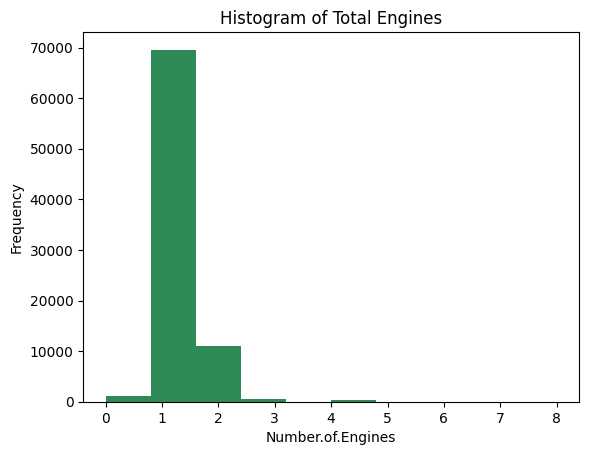

In [59]:
# Identification of Outlier
# Check shape of normal distribution curve
plt.hist(df['Number.of.Engines'], color = 'seagreen')
plt.xlabel('Number.of.Engines')
plt.ylabel ('Frequency')
plt.title ('Histogram of Total Engines')

In [60]:
df_filled['Number.of.Engines'].max()

8.0

In [61]:
df_filled['Number.of.Engines'].mean()

1.14658535112614

In [62]:
#remove outliers from the Number of Engines column
Q1= df_filled['Number.of.Engines'].quantile(0.05)
Q3= df_filled['Number.of.Engines'].quantile(0.95)
IQR= Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_filtered = df_filled[(df_filled['Number.of.Engines']>=lower_bound) & (df_filled['Number.of.Engines'] <= upper_bound)]

In [63]:
df_filled.shape

(88889, 27)

In [64]:
df_filtered.shape

(88454, 27)

Text(0.5, 1.0, 'Histogram of Total Engines')

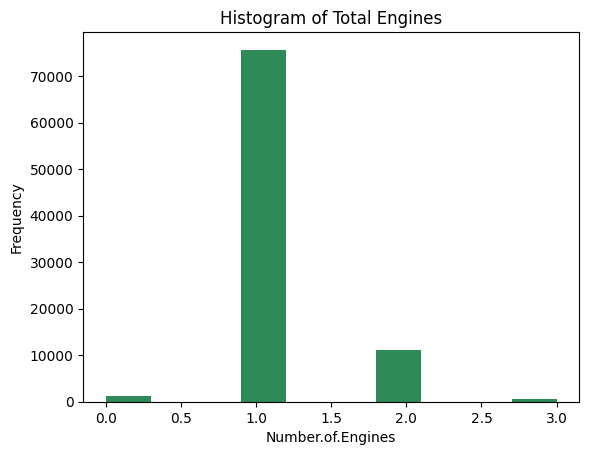

In [65]:
#checking impact of removing outliers
plt.hist(df_filtered['Number.of.Engines'], color = 'seagreen')
plt.xlabel('Number.of.Engines')
plt.ylabel ('Frequency')
plt.title ('Histogram of Total Engines')

# **Data Visualization**

## **Univariate Analysis**

## Creating Pie Chart for Aircraft Damage Analysis

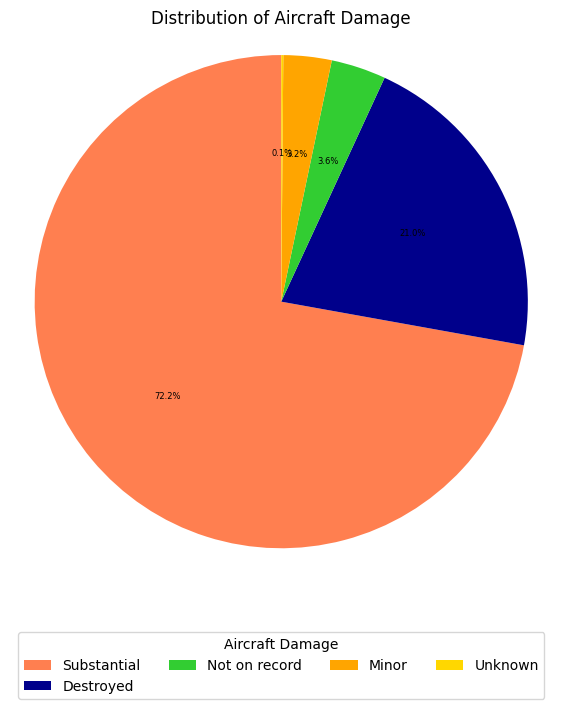

In [66]:


# Count the occurrences of each category
category_counts = df['Aircraft.damage'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_counts, autopct='%1.1f%%', startangle=90,colors=['coral', 'darkblue', 'limegreen', 'orange', 'gold'],textprops={'fontsize': 6})

# Place legend at the bottom
plt.legend(category_counts.index, title="Aircraft Damage", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.title('Distribution of Aircraft Damage')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# 72.2% of the time, aircraft was substantially damaged in the accident/incident.

# Creating Bar Chart for Broad Phase of Flight when accident happened

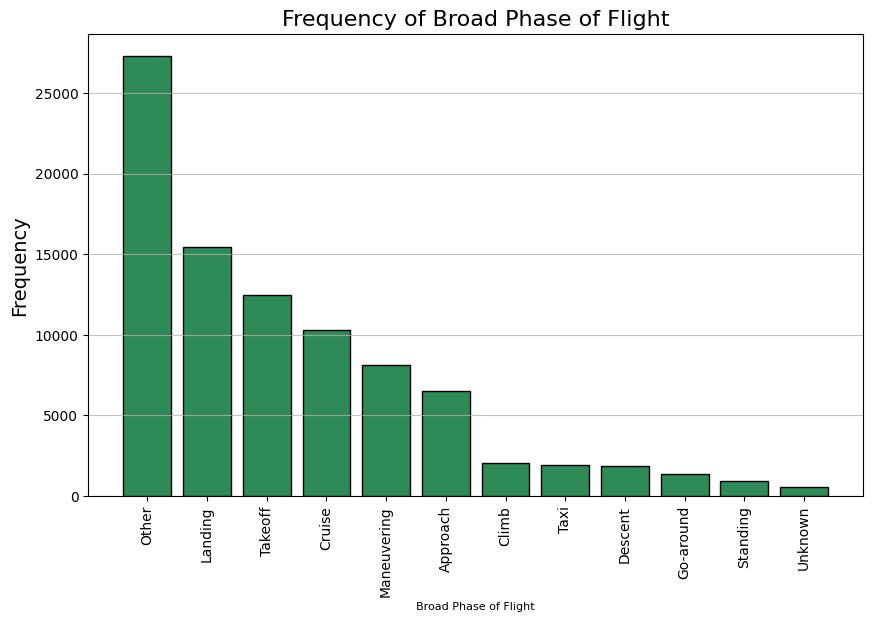

In [67]:


# Count occurrences of each phase
phase_counts = df['Broad.phase.of.flight'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(phase_counts.index, phase_counts.values, color='seagreen', edgecolor='black')

# Adding titles and labels
plt.title('Frequency of Broad Phase of Flight', fontsize=16)
plt.xlabel('Broad Phase of Flight', fontsize=8)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)

plt.show()

# The graph reflects the phase of flight when number of accidents occured.

# Box Plot to reflect occurence of total injuries by injury severity

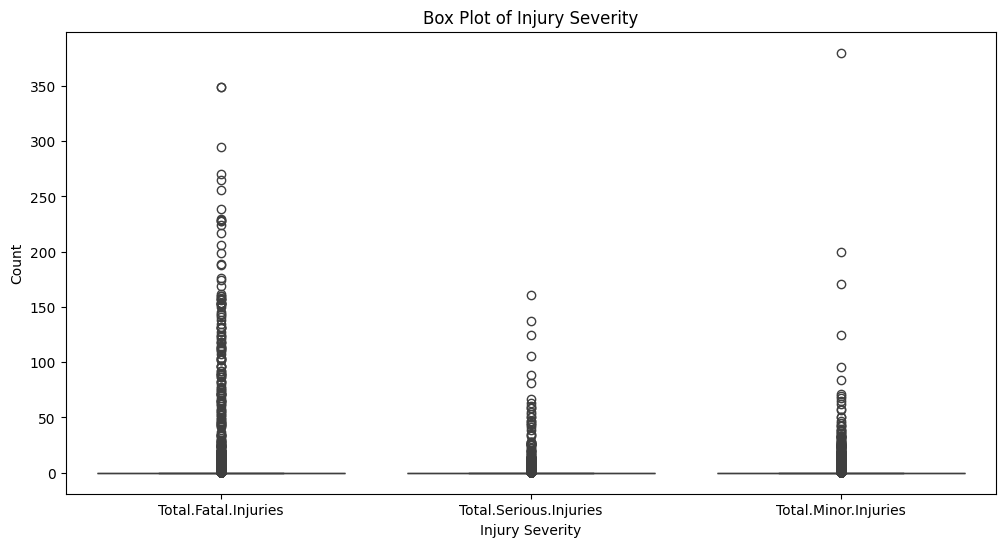

In [68]:
# Create a box plot for Occurence of Total  Injuries by Injury Severity
injury_data = pd.melt(df,
                      id_vars=['Event.Id'],
                      value_vars=['Total.Fatal.Injuries',
                                  'Total.Serious.Injuries',
                                  'Total.Minor.Injuries'],
                      var_name='Injury Severity',
                      value_name='Count')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Injury Severity', y='Count', data=injury_data)
plt.title('Box Plot of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.show()

# The graph assist in visualizing the distribution of total injuries across different categories of injury severity. Through this plot  the central tendency, spread, and potential outliers in the data can be identified.

# Violin Plot of Occurence of Total Injuries by Number of Engines

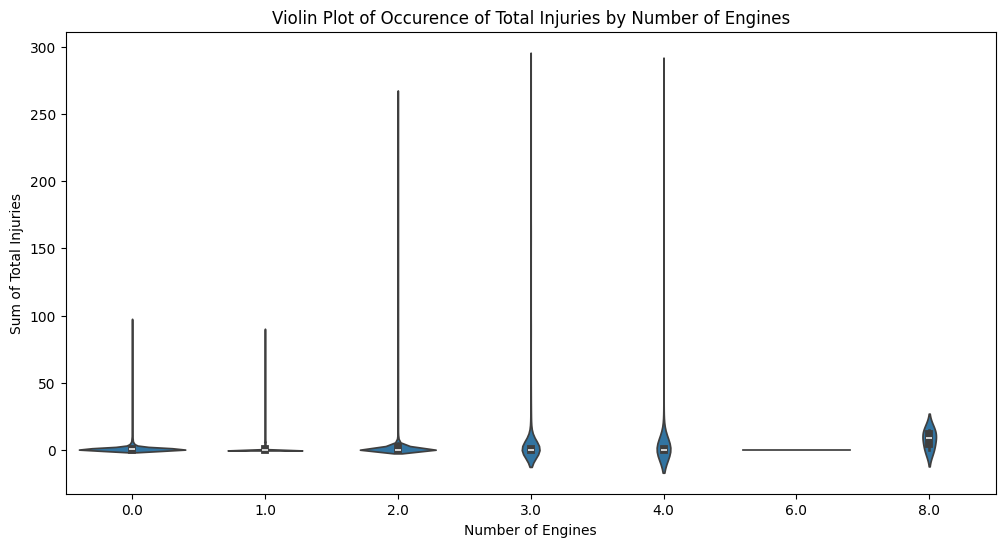

In [69]:
# Create a violin plot
# Calculate total injuries
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

# Aggregate the data by number of engines, summing the total injuries
injury_sum = df.groupby('Number.of.Engines')['Total.Injuries'].sum().reset_index()

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Number.of.Engines', y='Total.Injuries', data=df)
plt.title('Violin Plot of Occurence of Total Injuries by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Sum of Total Injuries')
plt.show()

 The plot provides a visual representation of the distribution of total injuries across different categories of engine counts.

The width of the "violin" at any given level indicates the density of data points (total injuries) for that particular number of engines. A wider section means that more instances of total injuries exist at that value.

The white dot  in the center  represents the median of total injuries for each number of engines.

The thick bar in the center  represents the interquartile range (IQR), which contains the middle 50% of the data.


# Bar Chart to demonstrate top 10 Aircraft Makes involved in accidents/ incidents

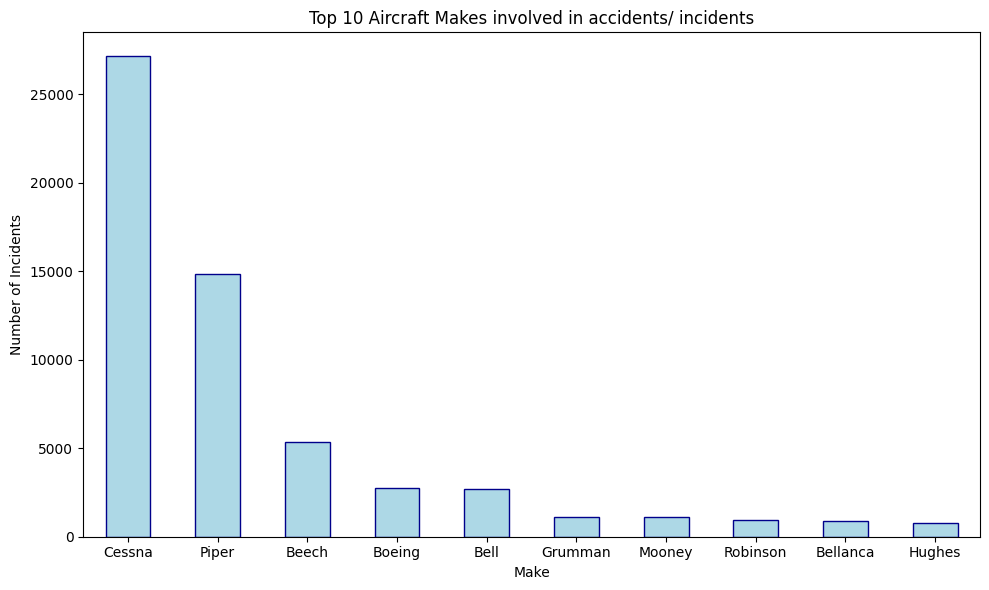

In [70]:
# Count occurrences of each Make
make_counts = df['Make'].value_counts()

# Get the top 10 Makes
top_10_makes = make_counts.nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar', color='lightblue', edgecolor='darkblue')
plt.title('Top 10 Aircraft Makes involved in accidents/ incidents')
plt.xlabel('Make')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

# The bar chart effectively communicates critical information about aircraft safety and incident prevalence. It serves as a valuable tool for stakeholders to make informed decisions based on historical data regarding aircraft performance and safety records

# Pie Chart for evaluating occurence of accident when aircraft was Amateur Built or Not Amateur Built

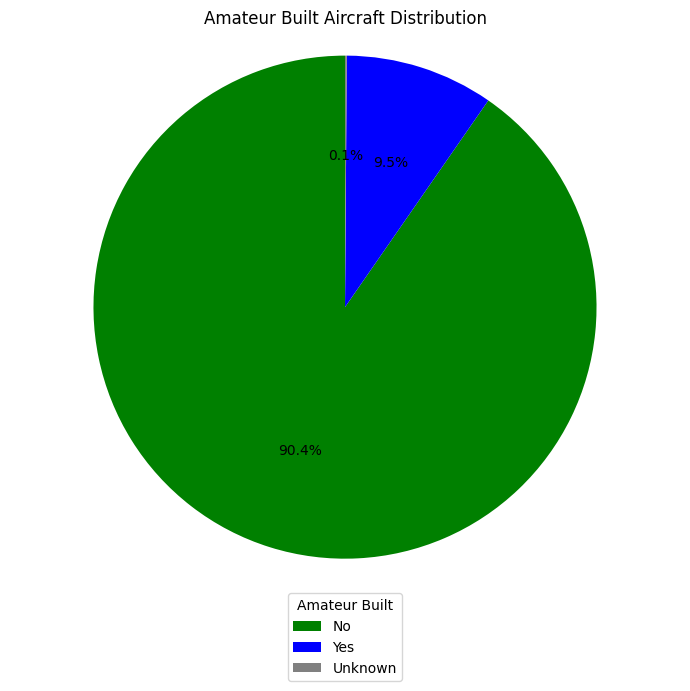

In [71]:
# Count occurrences of Amateur Built vs Not Amateur Built
amateur_counts = df['Amateur.Built'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(amateur_counts, autopct='%1.1f%%', startangle=90, colors=['Green', 'Blue', 'Grey'], labels=None)
plt.title('Amateur Built Aircraft Distribution')

# Adding a legend at the bottom
plt.legend(amateur_counts.index, title='Amateur Built', loc='center', bbox_to_anchor=(0.5, -0.1), fontsize='medium')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Not Amateur Built segment represented in 90% occurence of accidents, it suggests a higher proportion of accidents associated with these types of aircraft.

# However, 9.5% of accidents occured in amateur-built aircraft, it may prompt further investigation into factors such as design, construction quality, and operational practices.

# **Bivariate Analysis**

# Heat Map of Total Fatal Injuries by Weather Condition

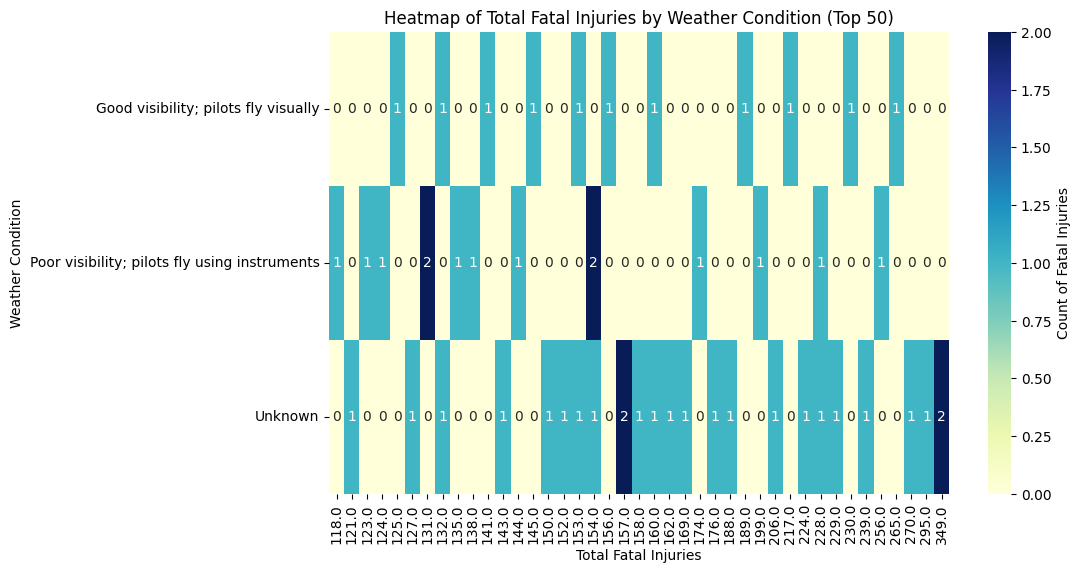

In [72]:


# Create a contingency table (pivot table) for total fatal injuries and weather condition
heatmap_data = df.groupby(['Weather.Condition', 'Total.Fatal.Injuries']).size().unstack(fill_value=0)

# Get the top 50 entries based on Total Fatal Injuries
top_15_fatal_injuries = df.nlargest(50, 'Total.Fatal.Injuries')

# Create a contingency table (pivot table) for the top 15 fatal injuries and weather conditions
heatmap_data = top_15_fatal_injuries.groupby(['Weather.Condition', 'Total.Fatal.Injuries']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count of Fatal Injuries'})
plt.title('Heatmap of Total Fatal Injuries by Weather Condition (Top 50)')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Weather Condition')
plt.show()


# A heatmap of total fatal injuries by weather condition provides a visual representation of the relationship between different weather conditions and the number of fatal injuries resulting from accidents.

# The cells of the heatmap are colored based on the ocuurence of total fatal injuries. A color gradient (often from light to dark) indicates the severity: darker colors may represent higher occurence of fatal injuries, while lighter colors represent lower occurence.

# Stakeholders, including regulators and safety organizations, can use this information to implement safety measures, develop training programs, or enhance regulations for operations under certain weather conditions.

# Bar Plot to reflect top 7 Aircraft Makes by Total Injuries

<ipython-input-73-8d5357ab362f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total.Injuries', y='Make', data=top_5_makes, palette='viridis')


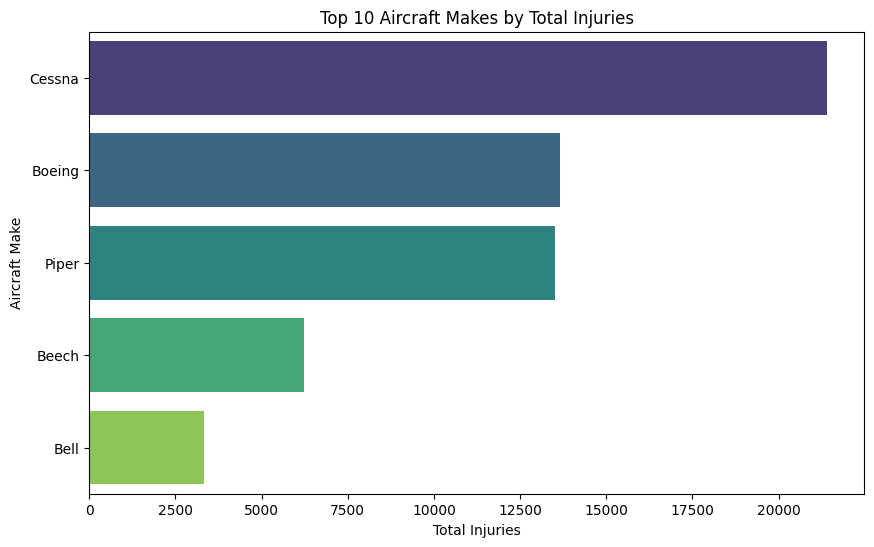

In [73]:

# Group by Make and sum Total Injuries
make_total_injuries = df.groupby('Make')['Total.Injuries'].sum().reset_index()

# Get the top 5 makes by Total Injuries
top_5_makes = make_total_injuries.nlargest(5, 'Total.Injuries')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total.Injuries', y='Make', data=top_5_makes, palette='viridis')
plt.title('Top 10 Aircraft Makes by Total Injuries')
plt.xlabel('Total Injuries')
plt.ylabel('Aircraft Make')
plt.show()

# Through the above chart it can be identified which aircraft models have the highest total injuries.

# Pair Plot of Total Injuries and Broad Phase of Flight

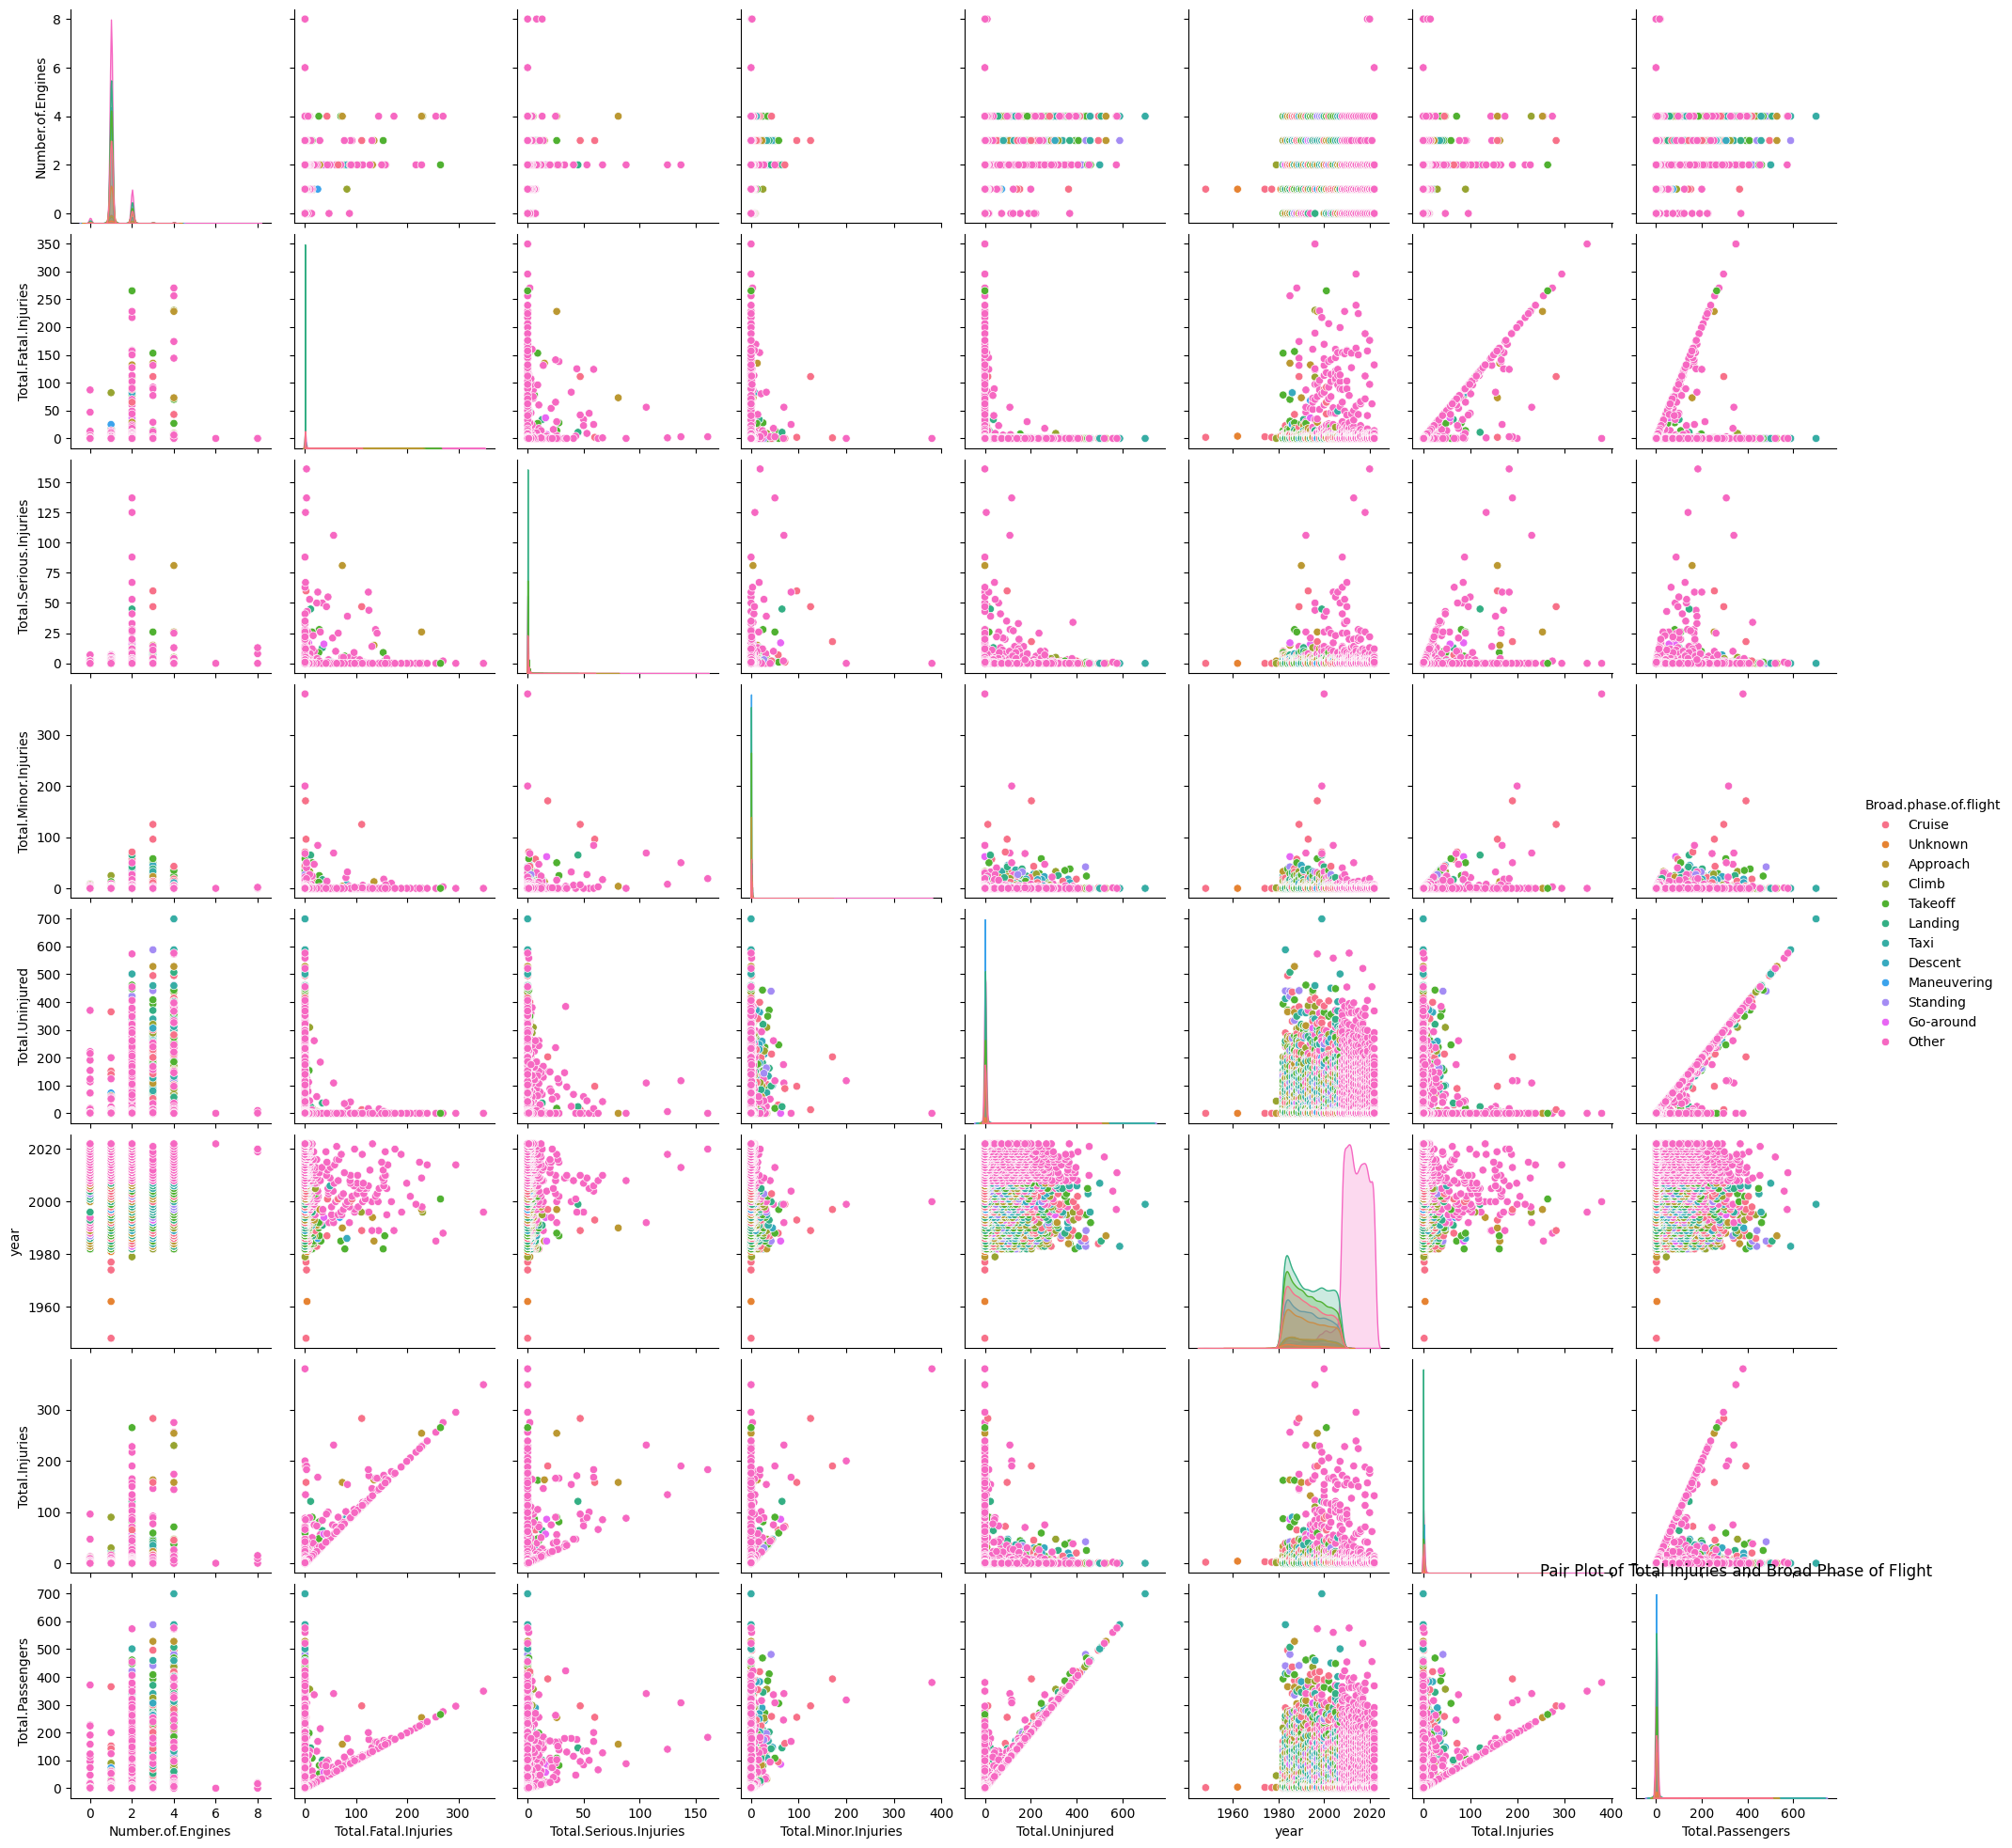

In [74]:
# Create a pair plot
sns.pairplot(df, hue='Broad.phase.of.flight')
plt.title('Pair Plot of Total Injuries and Broad Phase of Flight')
plt.show()

# It shows the nature of relationship between Total Injuries and Broad Phase of Flight. It helps in identifying patterns, distributions, and potential correlations, aiding stakeholders in understanding safety risks associated with different phases of flight.

## **Time Series Analysis**

# Combined Bar and Line Chart

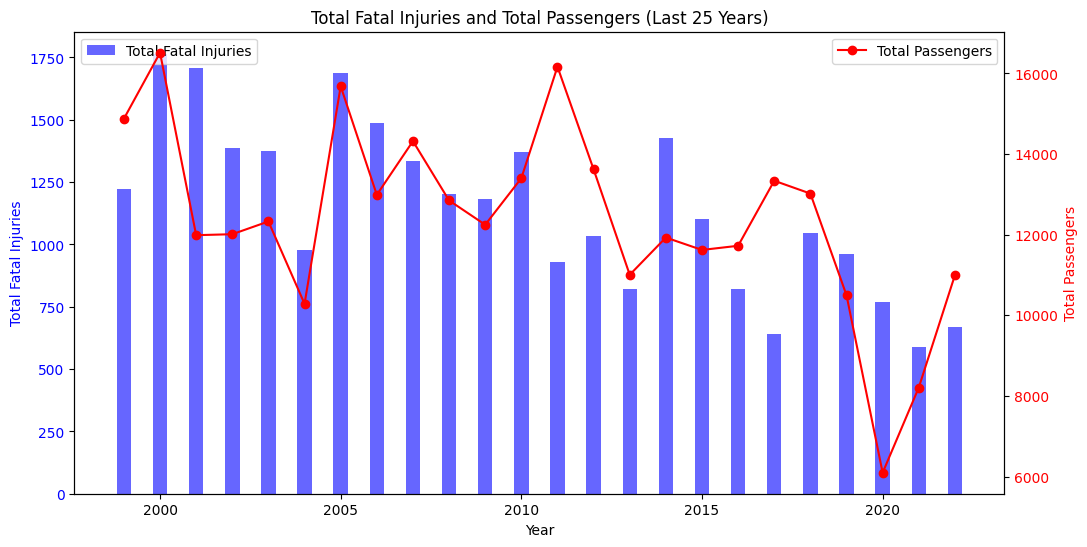

In [75]:

current_year = pd.to_datetime('now').year
# Filter for the last 25 years
start_year = current_year - 25
df['year'] = df['Event.Date'].dt.year
df = df[df['year'] >= start_year]

# Aggregate total fatal injuries and total passengers by year
year_summary = df.groupby('year').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Passengers': 'sum'
}).reset_index()

# Create the combined bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total fatal injuries
ax1.bar(year_summary['year'], year_summary['Total.Fatal.Injuries'], color='b', alpha=0.6, label='Total Fatal Injuries', width=0.4)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Fatal Injuries', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for total passengers
ax2 = ax1.twinx()
ax2.plot(year_summary['year'], year_summary['Total.Passengers'], color='r', marker='o', label='Total Passengers')
ax2.set_ylabel('Total Passengers', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and legends
plt.title('Total Fatal Injuries and Total Passengers (Last 25 Years)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# The chart provides a comprehensive view of trends in aviation safety relative to passenger volume. It serves as a valuable tool for stakeholders to assess trends in aviation safety, identify areas for improvement, and understand how safety measures have evolved in response to increasing air travel.

# Stacked area plot for total injuries over 10 years

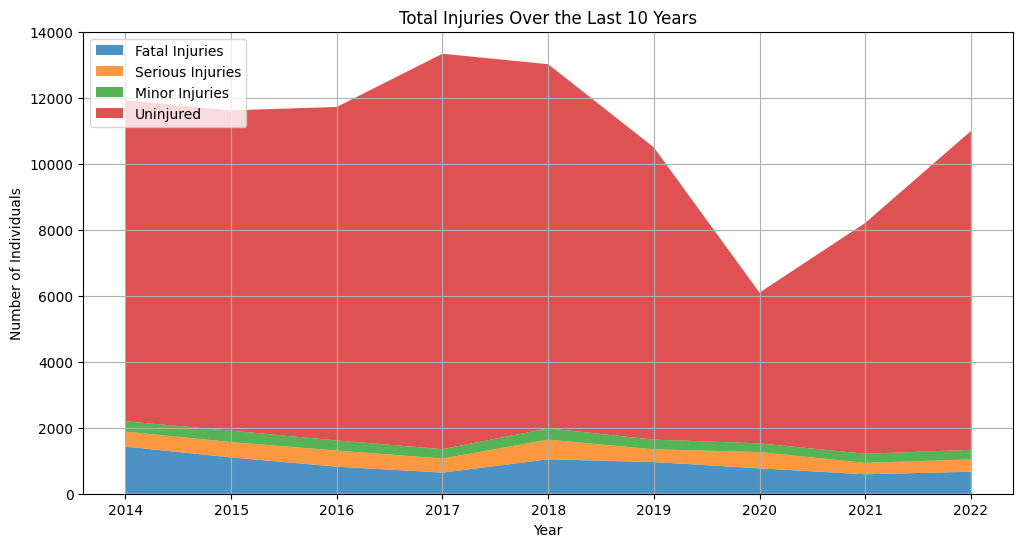

In [76]:
# Filter for the last decade

current_year = pd.to_datetime('now').year
last_10_years = df[df['year'] >= current_year - 10]

# Group by year and sum the injuries
grouped_data = last_10_years.groupby('year').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Set the year as the index for plotting
grouped_data.set_index('year', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.stackplot(grouped_data.index,
               grouped_data['Total.Fatal.Injuries'],
               grouped_data['Total.Serious.Injuries'],
               grouped_data['Total.Minor.Injuries'],
               grouped_data['Total.Uninjured'],
               labels=['Fatal Injuries', 'Serious Injuries', 'Minor Injuries', 'Uninjured'],
               alpha=0.8)

plt.title('Total Injuries Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')
plt.legend(loc='upper left')
plt.grid()
plt.show()


# The graph shows the distribution and trends of different types of injuries over time. It provides valuable insights for stakeholders, helping them understand patterns, assess the impact of safety measures, and identify areas that may require further attention.

# **Graphs using Plotly Library**

# Choropleth map for Occurences of Aviation Events by Country

In [77]:
# Aggregate the number of occurrences by country
country_occurrences = df.groupby('Country')['Event.Id'].count().reset_index()
country_occurrences.columns = ['Country', 'Occurrences']

# Create the choropleth map with the aggregated data
fig = px.choropleth(country_occurrences,
                    locations='Country',
                    locationmode='country names',
                    color='Occurrences',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Occurrences of Aviation Events by Country',
                    labels={'Occurrences': 'Number of Occurrences'})

# Show the map
fig.show()

# A choropleth map displays the number of aviation events by country.

# Sunburst chart to visualize the top 7 aircraft makes involved in accidents, segmented by injury severity

In [78]:
# Aggregate data to get counts for each make and severity
make_counts = df.groupby(['Make', 'Injury.Severity']).size().reset_index(name='Occurrences')

# Get the top 7 makes by occurrences
top_makes = make_counts.groupby('Make')['Occurrences'].sum().nlargest(7).index
filtered_data = make_counts[make_counts['Make'].isin(top_makes)]

# Create the sunburst chart
fig = px.sunburst(filtered_data, path=['Make', 'Injury.Severity'], values='Occurrences', title='Top 7 Aircraft Makes by Injury Severity')
fig.show()

# By comparing the sizes of the segments, it can be quickly identified which makes have higher occurrences of more severe injuries

# Treemap for Injuries by Engine Type (Top 6) and Severity

In [79]:
# Aggregate the data to get counts for each engine type and injury severity
engine_counts = df.groupby('Engine.Type').size().reset_index(name='Occurrences')

# Get the top 6 engine types by occurrences
top_engines = engine_counts.nlargest(6, 'Occurrences')['Engine.Type']

# Filter the original data for top 6 engine types
filtered_data = df[df['Engine.Type'].isin(top_engines)]

# Aggregate the filtered data for the treemap
treemap_data = filtered_data.groupby(['Engine.Type', 'Injury.Severity']).size().reset_index(name='Occurrences')

# Create the treemap
fig = px.treemap(treemap_data, path=['Engine.Type', 'Injury.Severity'], values='Occurrences', title='Injuries by Engine Type and Severity')
fig.show()

# The treemap visually represents how injuries are distributed across different engine types

# Descriptive Statistics of Multiple Columns

In [80]:
#Total Fatal Injuries

mean = df['Total.Fatal.Injuries'].mean()
median = df['Total.Fatal.Injuries'].median()
mode_result = stats.mode(df['Total.Fatal.Injuries'])
std_dev= df['Total.Fatal.Injuries'].std()
variance = df['Total.Fatal.Injuries'].var()
min_value = df['Total.Fatal.Injuries'].min()
max_value = df['Total.Fatal.Injuries'].max()
quantiles = df['Total.Fatal.Injuries'].quantile([0.25, 0.5, 0.75])
summary = df['Total.Fatal.Injuries'].describe()
skewness = stats.skew(df['Total.Fatal.Injuries'])
kurtosis = stats.kurtosis(df['Total.Fatal.Injuries'])

# Printing the results
print("Mean of Total Fatal Injuries:", mean)
print("Median of Total Fatal Injuries:", median)
print("Mode of Total Fatal Injuries:", mode_result)
print("Std.dev of Total Fatal Injuries:", std_dev)
print("Variance of Total Fatal Injuries:", variance)
print("Minimum of Total Fatal Injuries:", min_value)
print("Maximum of Total Fatal Injuries:", max_value)
print("Quantiles of Total Fatal Injuries:", quantiles)
print("Summary of Total Fatal Injuries:", summary)
print("Skewness of Total Fatal Injuries:", skewness)
print("Kurtosis of Total Fatal Injuries:", kurtosis)


Mean of Total Fatal Injuries: 0.6335121939985722
Median of Total Fatal Injuries: 0.0
Mode of Total Fatal Injuries: ModeResult(mode=0.0, count=34356)
Std.dev of Total Fatal Injuries: 5.589675997273636
Variance of Total Fatal Injuries: 31.244477754497012
Minimum of Total Fatal Injuries: 0.0
Maximum of Total Fatal Injuries: 295.0
Quantiles of Total Fatal Injuries: 0.25    0.0
0.50    0.0
0.75    0.0
Name: Total.Fatal.Injuries, dtype: float64
Summary of Total Fatal Injuries: count    43423.000000
mean         0.633512
std          5.589676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        295.000000
Name: Total.Fatal.Injuries, dtype: float64
Skewness of Total Fatal Injuries: 28.614228157784844
Kurtosis of Total Fatal Injuries: 975.3882598056442


### Analysis reflects that half of the data points are 0, indicating a large number of incidents with no fatal injuries.

### A high standard deviation relative to the mean indicates significant variability in the number of injuries.

### Maximum value indicates some incidents have up to 295 fatal injuries, which is quite high.

### Skewness Value: 28.61 indicates that the distribution of the data is heavily right-skewed, meaning there are a lot of zeros and a few large values pulling the average up.

### Kurtosis Value: 975.39 indicates that the distribution has heavy tails and a sharp peak, which aligns with the presence of outliers.

In [81]:
#Total Injuries

mean = df['Total.Injuries'].mean()
median = df['Total.Injuries'].median()
mode_result = stats.mode(df['Total.Injuries'])
std_dev= df['Total.Injuries'].std()
variance = df['Total.Injuries'].var()
min_value = df['Total.Injuries'].min()
max_value = df['Total.Injuries'].max()
quantiles = df['Total.Injuries'].quantile([0.25, 0.5, 0.75])
summary = df['Total.Injuries'].describe()
skewness = stats.skew(df['Total.Injuries'])
kurtosis = stats.kurtosis(df['Total.Injuries'])

# Printing the results
print("Mean of Total Injuries:", mean)
print("Median of Total Injuries:", median)
print("Mode of Total Injuries:", mode_result)
print("Std.dev of Total Injuries:", std_dev)
print("Variance of Total Injuries:", variance)
print("Minimum of Total Injuries:", min_value)
print("Maximum of Total Injuries:", max_value)
print("Quantiles of Total Injuries:", quantiles)
print("Summary of Total Injuries:", summary)
print("Skewness of Total Injuries:", skewness)
print("Kurtosis of Total Injuries:", kurtosis)

Mean of Total Injuries: 1.1713147410358566
Median of Total Injuries: 0.0
Mode of Total Injuries: ModeResult(mode=0.0, count=23644)
Std.dev of Total Injuries: 6.5639897010163555
Variance of Total Injuries: 43.085960795048784
Minimum of Total Injuries: 0.0
Maximum of Total Injuries: 380.0
Quantiles of Total Injuries: 0.25    0.0
0.50    0.0
0.75    1.0
Name: Total.Injuries, dtype: float64
Summary of Total Injuries: count    43423.000000
mean         1.171315
std          6.563990
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        380.000000
Name: Total.Injuries, dtype: float64
Skewness of Total Injuries: 26.14414300014783
Kurtosis of Total Injuries: 869.4732235864209


### On average, there are about 1.17 injuries per incident.
### The most common outcome is having zero injuries, consistent with the median.
### High value of standard deviation indicates significant variability in the number of injuries across incidents.
### Max value of 380.0 indicates that while many incidents result in no injuries, there are some with as many as 380 injuries.
### A very high positive skewness indicates a heavy right tail, meaning most data points cluster around zero, with a few extreme values raising the average.


In [82]:
# Total Passengers

mean = df['Total.Passengers'].mean()
median = df['Total.Passengers'].median()
mode_result = stats.mode(df['Total.Passengers'])
std_dev= df['Total.Passengers'].std()
variance = df['Total.Passengers'].var()
min_value = df['Total.Passengers'].min()
max_value = df['Total.Passengers'].max()
quantiles = df['Total.Passengers'].quantile([0.25, 0.5, 0.75])
summary = df['Total.Injuries'].describe()
skewness = stats.skew(df['Total.Passengers'])
kurtosis = stats.kurtosis(df['Total.Passengers'])

# Printing the results
print("Mean of Total Passengers:", mean)
print("Median of Total Passengers:", median)
print("Mode of Total Passengers:", mode_result)
print("Std.dev of Total Passengers:", std_dev)
print("Variance of Total Passengers:", variance)
print("Minimum of Total Passengers:", min_value)
print("Maximum of Total Passengers:", max_value)
print("Quantiles of Total Passengers:", quantiles)
print("Summary of Total Passengers:", summary)
print("Skewness of Total Passengers:", skewness)
print("Kurtosis of Total Passengers:", kurtosis)

Mean of Total Passengers: 6.856205236856044
Median of Total Passengers: 2.0
Mode of Total Passengers: ModeResult(mode=1.0, count=18773)
Std.dev of Total Passengers: 30.149465746090044
Variance of Total Passengers: 908.9902847746569
Minimum of Total Passengers: 0.0
Maximum of Total Passengers: 699.0
Quantiles of Total Passengers: 0.25    1.0
0.50    2.0
0.75    2.0
Name: Total.Passengers, dtype: float64
Summary of Total Passengers: count    43423.000000
mean         1.171315
std          6.563990
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        380.000000
Name: Total.Injuries, dtype: float64
Skewness of Total Passengers: 7.962776834991106
Kurtosis of Total Passengers: 80.39181141609238


### On average, there are about 6.86 passengers involved per incident.
### Some incidents have a very high number (699), indicating significant outliers.
### A high positive skewness indicates that most incidents involve few passengers, with a long tail of incidents with many passengers.
### Very high kurtosis indicates extreme outliers and a distribution that has a very sharp peak and heavy tails.

## **Pulling Data from an API source**
### As my data does not clearly defined the major causes of accidents therefore, data was extracted from Wikipedia through API

In [83]:
# Define the URL for the Wikipedia API
url = "https://en.wikipedia.org/w/api.php"

# Set up the parameters for the API request
params = {
    'action': 'parse',
    'page': 'Aviation_accident_analysis',
    'format': 'json',
    'prop': 'text',
}

# Send the request to the API
response = requests.get(url, params=params)
data = response.json()

# Extract the HTML content
html_content = data['parse']['text']['*']

# Use BeautifulSoup to parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Find all paragraph tags
paragraphs = soup.find_all('p')

# Combine text from paragraphs
full_text = ' '.join([para.get_text() for para in paragraphs])

# Clean up the text
# Remove citation markers (e.g., [3], [4])
cleaned_text = re.sub(r'\[\d+\]', '', full_text)

# Remove any empty brackets
cleaned_text = re.sub(r'\[\]', '', cleaned_text)

# Print the cleaned text
print(cleaned_text)

Aviation accident analysis is performed to determine the cause of errors once an accident has happened. In the modern aviation industry, it is also used to analyze a database of past accidents in order to prevent an accident from happening. Many models have been used not only for the accident investigation but also for educational purpose.
 Per the Convention on International Civil Aviation, if an aircraft of a contracting State has an accident or incident in another contracting State, the State where the accident occurs will institute an inquiry. The Convention defines the rights and responsibilities of the states.
 ICAO Annex 13—Aircraft Accident and Incident Investigation—defines which States may participate in an investigation, for example: the States of Occurrence, Registry, Operator, Design and Manufacture.
 In the aviation industry, human error is the major cause of accidents. About 38% of 329 major airline crashes, 74% of 1627 commuter/air taxi crashes, and 85% of 27935 general